In [51]:
import tensorflow_hub as hub
import tensorflow as tf
import yaml
from pathlib import Path
from utils import display_images
import numpy as np

from data_gen import generate_sin_data, generate_mnist_data, generate_mnist_data_dcgan
config = yaml.load(Path("config.yaml").read_text(), Loader=yaml.SafeLoader)

train_dataset = generate_mnist_data_dcgan(config)

In [44]:
for step, train_batch in enumerate(train_dataset):
    train_example = train_batch[0:10]
    x = classifier.predict(train_example)
    x = tf.nn.softmax(x)
    break

In [48]:
x[0+4:8]

<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
array([[2.1488663e-06, 9.9994791e-01, 5.2335285e-08, 5.9154354e-10,
        4.0116433e-05, 3.4568753e-08, 5.9944563e-07, 6.9745615e-06,
        1.3699414e-06, 7.3605690e-07],
       [1.9035352e-07, 8.2692386e-06, 8.5608697e-08, 1.5469035e-07,
        9.9975830e-01, 8.8639234e-07, 1.8272266e-07, 6.7142675e-05,
        3.5920451e-07, 1.6452272e-04],
       [4.0322420e-06, 9.9996316e-01, 1.1726181e-06, 1.9578312e-09,
        1.4953148e-05, 9.3478519e-08, 7.6690694e-06, 5.8358955e-06,
        3.0401218e-06, 5.4472526e-08],
       [1.8407749e-07, 3.7658012e-08, 8.8243469e-06, 9.9972230e-01,
        1.6207904e-09, 1.2719268e-05, 5.5739151e-09, 1.6400037e-07,
        1.3136789e-04, 1.2439727e-04]], dtype=float32)>

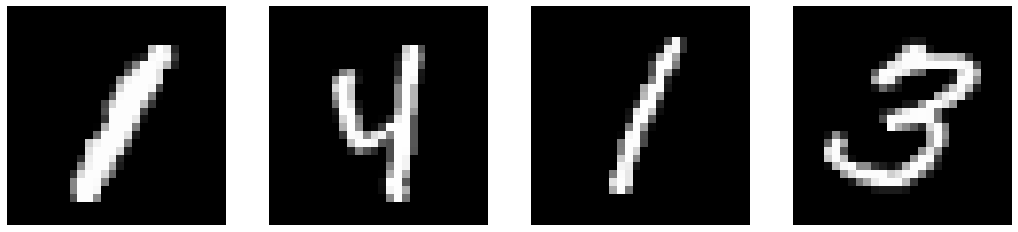

In [46]:
display_images(train_example)

## Inception score

In [62]:
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/tfgan/eval/mnist/logits/1")
])

def get_inception_score(classifier, images):
    preds = classifier.predict(images)
    preds = tf.nn.softmax(preds)
    
    kl = preds * (np.log(preds) - np.log(np.expand_dims(np.mean(preds, 0), 0)))
    kl = np.mean(np.sum(kl, 1))
    score = np.exp(kl)
    return score


In [63]:
scores = []
for step, train_batch in enumerate(train_dataset):
    score = get_inception_score(classifier, train_batch)
    scores.append(score)
    

In [64]:
print(np.mean(scores), np.std(scores))

9.5337305 0.1179902
